In [1]:
#!pip install git+https://github.com/pmc93/aarhusInv.git --force-reinstall


import numpy as np
import os
import matplotlib.pyplot as plt



In [2]:
import aarhusInv 

C:\Users\au701230\WPy64-31090\python-3.10.9.amd64\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
inv_dir = r'C:\Users\au701230\OneDrive - Aarhus Universitet\Desktop\pyTEM\inv_dir'


A = aarhusInv.Model(inv_dir)

# tidy directory
for fwr_file in A.getFileList(path=inv_dir, extension='Fwr'):
    
    os.remove(fwr_file)


A = aarhusInv.Model(inv_dir)

A.createModel(rhos = [500000., 50000000., 50000000.], depths = [1., 20.])
A.createModel(rhos = [50., 10., 20.,], depths = [1., 10.])
A.createModel(rhos = [50., 10.,], depths = [1.])
A.createModel(rhos = [150., 10., 200.,], depths = [100., 20.])
A.createModel(rhos = [50., 110., 20.,], depths = [1., 30., 20.])
A.createModel(rhos = [500., 10., 20.,], depths = [1., 3.])

A.models  = [A.models] * 10 #check max number of models, works up to 36,000  capabilities

A.models = [item for sublist in A.models for item in sublist] #flatten list

Depths need to be ascending, model will be skipped.
Number of depths should be 1 less than rhos, model will be skipped.


In [4]:
tem_file = '20240306_station1.tem'
A.writeModFile(tem_file=tem_file, analysis=True)

my_mod.mod has been created.


In [5]:
A.runInv()

AarhusInv - Started
AarhusInv - Done
Elapsed time is 6.93 seconds.


In [6]:
fwr_list = A.getFileList(path=inv_dir, extension='.fwr')
print(len(fwr_list))

n_gates = 20
data_matrix = np.ones((len(fwr_list), n_gates)).T

for i, fwr_file in enumerate(fwr_list):
    data_matrix[:,i] = A.readFWR(fwr_file, n_header_lines=17).values[:,1]    

40


C:\Users\au701230\AppData\Local\Temp\ipykernel_15548\1416329511.py:3: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(data_matrix))


Text(0, 0.5, 'Gate Index')

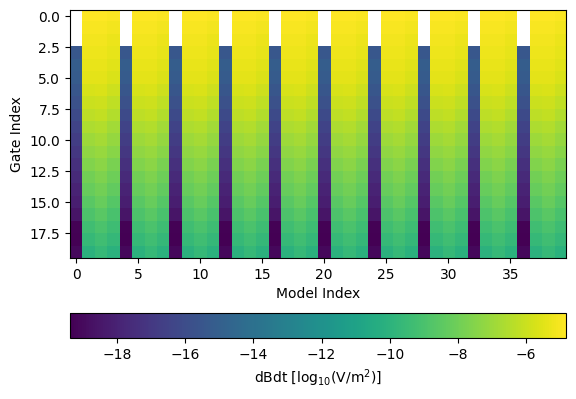

In [7]:
fig, ax = plt.subplots(1,1)

im = ax.imshow(np.log10(data_matrix))

plt.colorbar(im, orientation='horizontal').set_label('dBdt [log$_{10}$(V/m$^2$)]')

ax.set_xlabel('Model Index')
ax.set_ylabel('Gate Index')